# Восстановление золота из руды

Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды, используя данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

План:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats as st

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

pd.set_option('display.float_format', '{:,.2f}'.format)

## Подготовка данных

1. Открытие и изучение файлов
2. Проверка правильности расчета эффективности обогащения. Вычислить её на обучающей выборке для признака rougher.output.recovery. Найти MAE между вашими расчётами и значением признака.
3. Анализ признаков, недоступных в тестовой выборке. Что это за параметры? К какому типу относятся?
4. Предобработка данных.

### Открытие и изучение файлов



In [2]:
df_keys = ["train", "test", "full"]

In [3]:
df = {}
for key in df_keys:
    df[key] = pd.read_csv(f'f:/yandex-practicum/datasets/gold_recovery_{key}_new.csv')

In [4]:
def df_study(dframe):
    print()
    dframe.info()
    print("\nПропуски\n", dframe.isna().sum()[dframe.isna().sum() != 0].sort_values(ascending=False))
    print("\nЯвных дубликатов:",dframe.duplicated().sum())
    dframe.hist(figsize=(20,20))
    display(dframe.head())

In [5]:
[df[key].shape for key in df_keys]# просмотр размеров таблиц

[(14149, 87), (5290, 53), (19439, 87)]

#### Тренировочная выборка


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


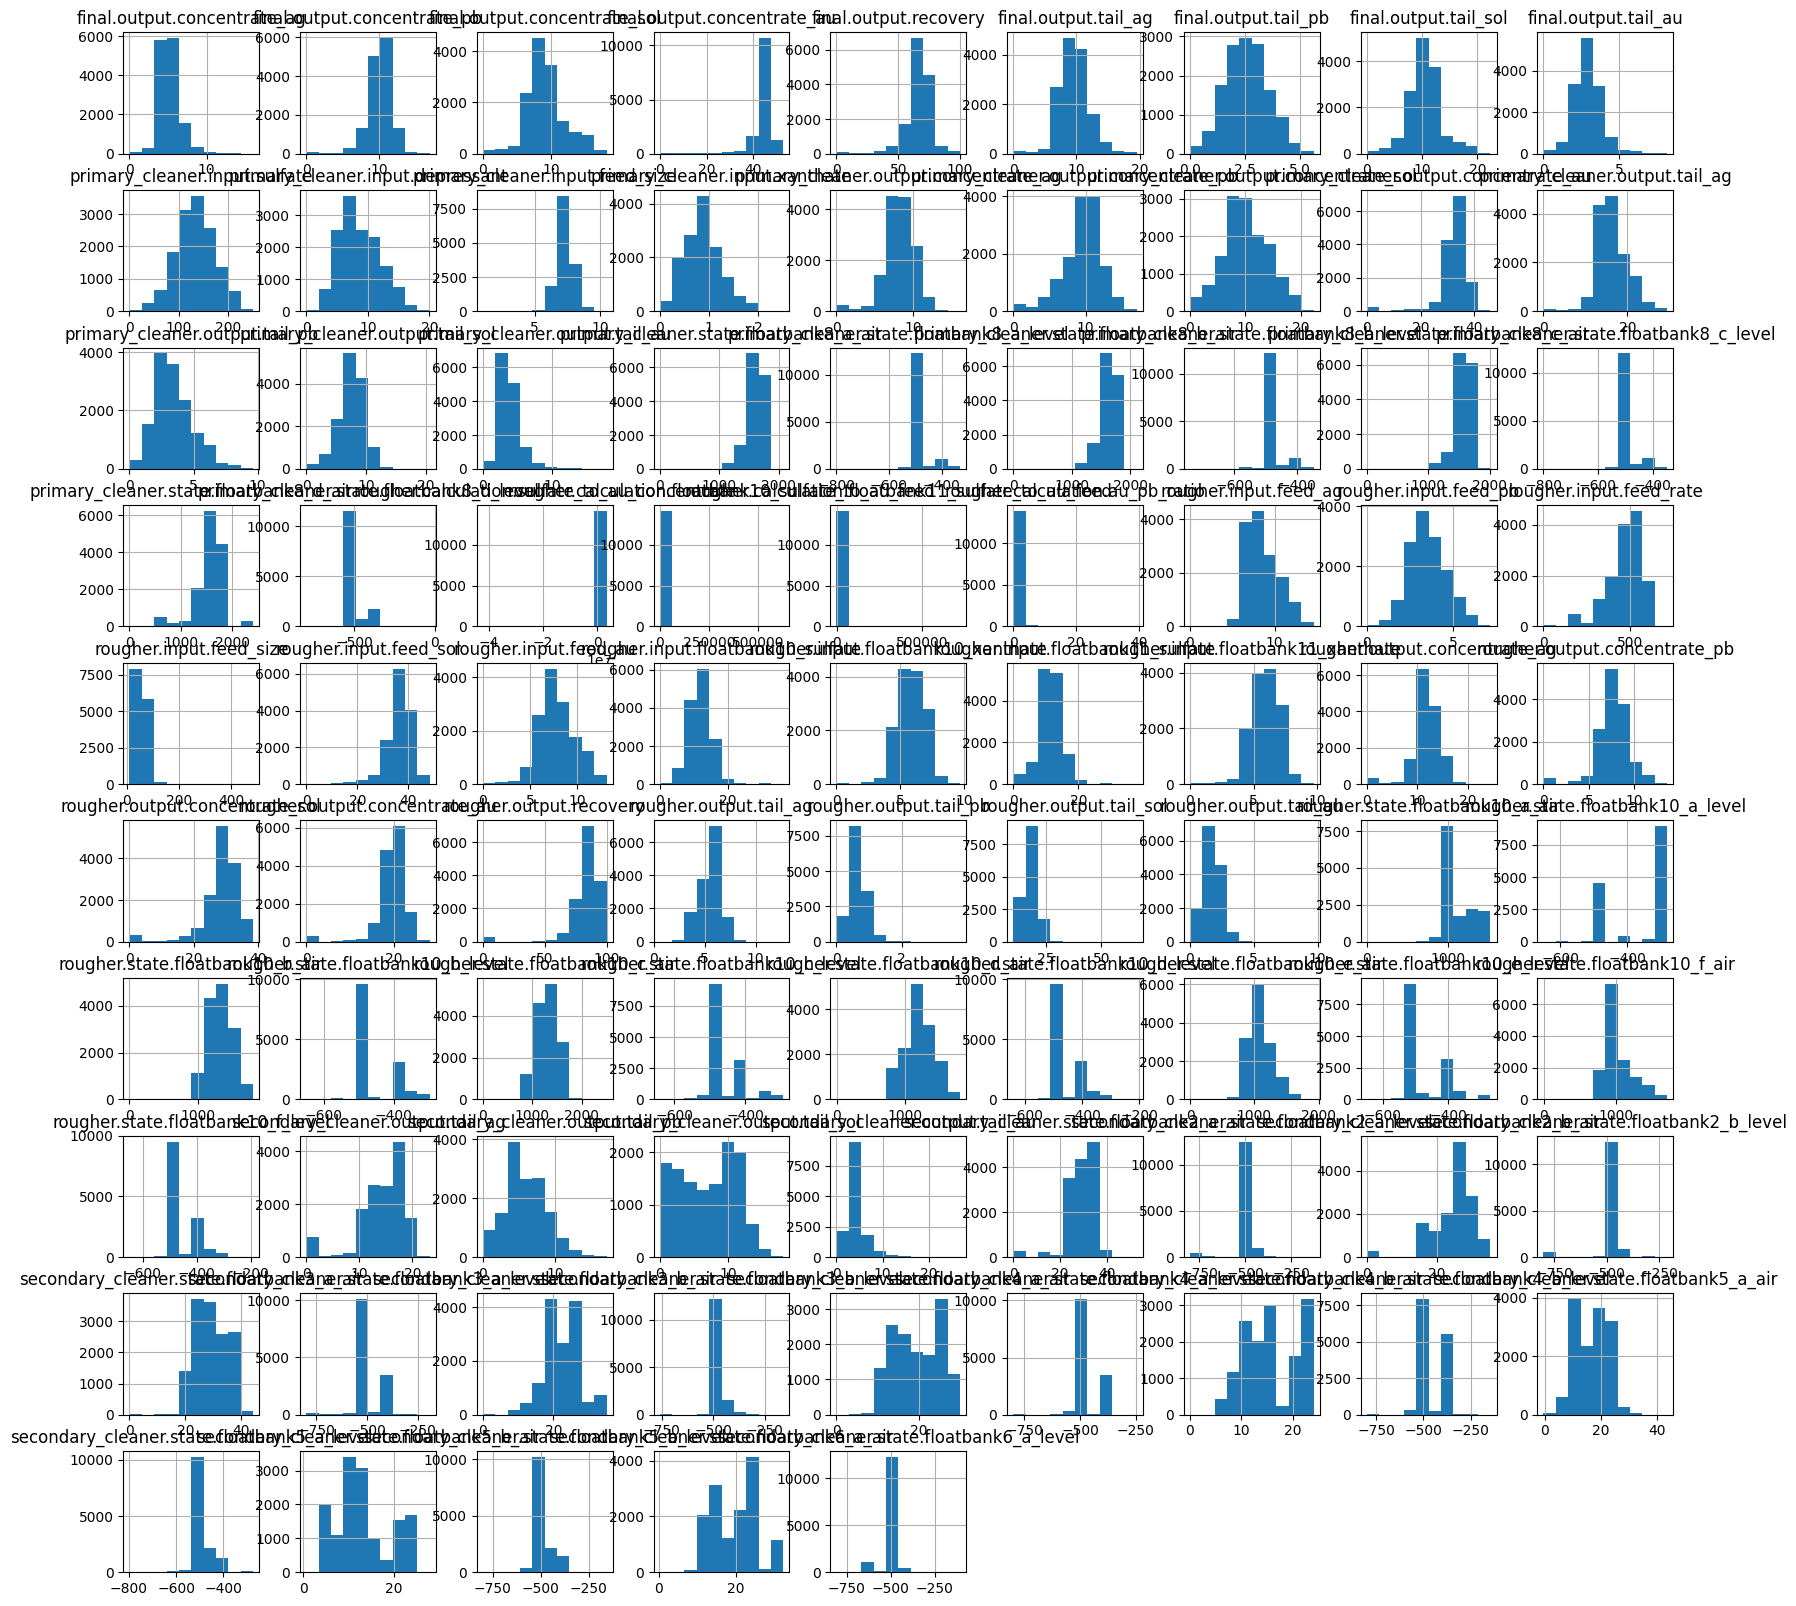

In [6]:
df_study(df['train'])

#### Тестовая выборка


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_cle

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,"1,398.98",-500.23,"1,399.14",-499.92,"1,400.10",...,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,"1,398.78",-500.06,"1,398.06",-499.78,"1,396.15",...,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,"1,398.49",-500.87,"1,398.86",-499.76,"1,398.08",...,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,"1,399.62",-498.86,"1,397.44",-499.21,"1,400.13",...,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,"1,401.27",-500.81,"1,398.13",-499.50,"1,402.17",...,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


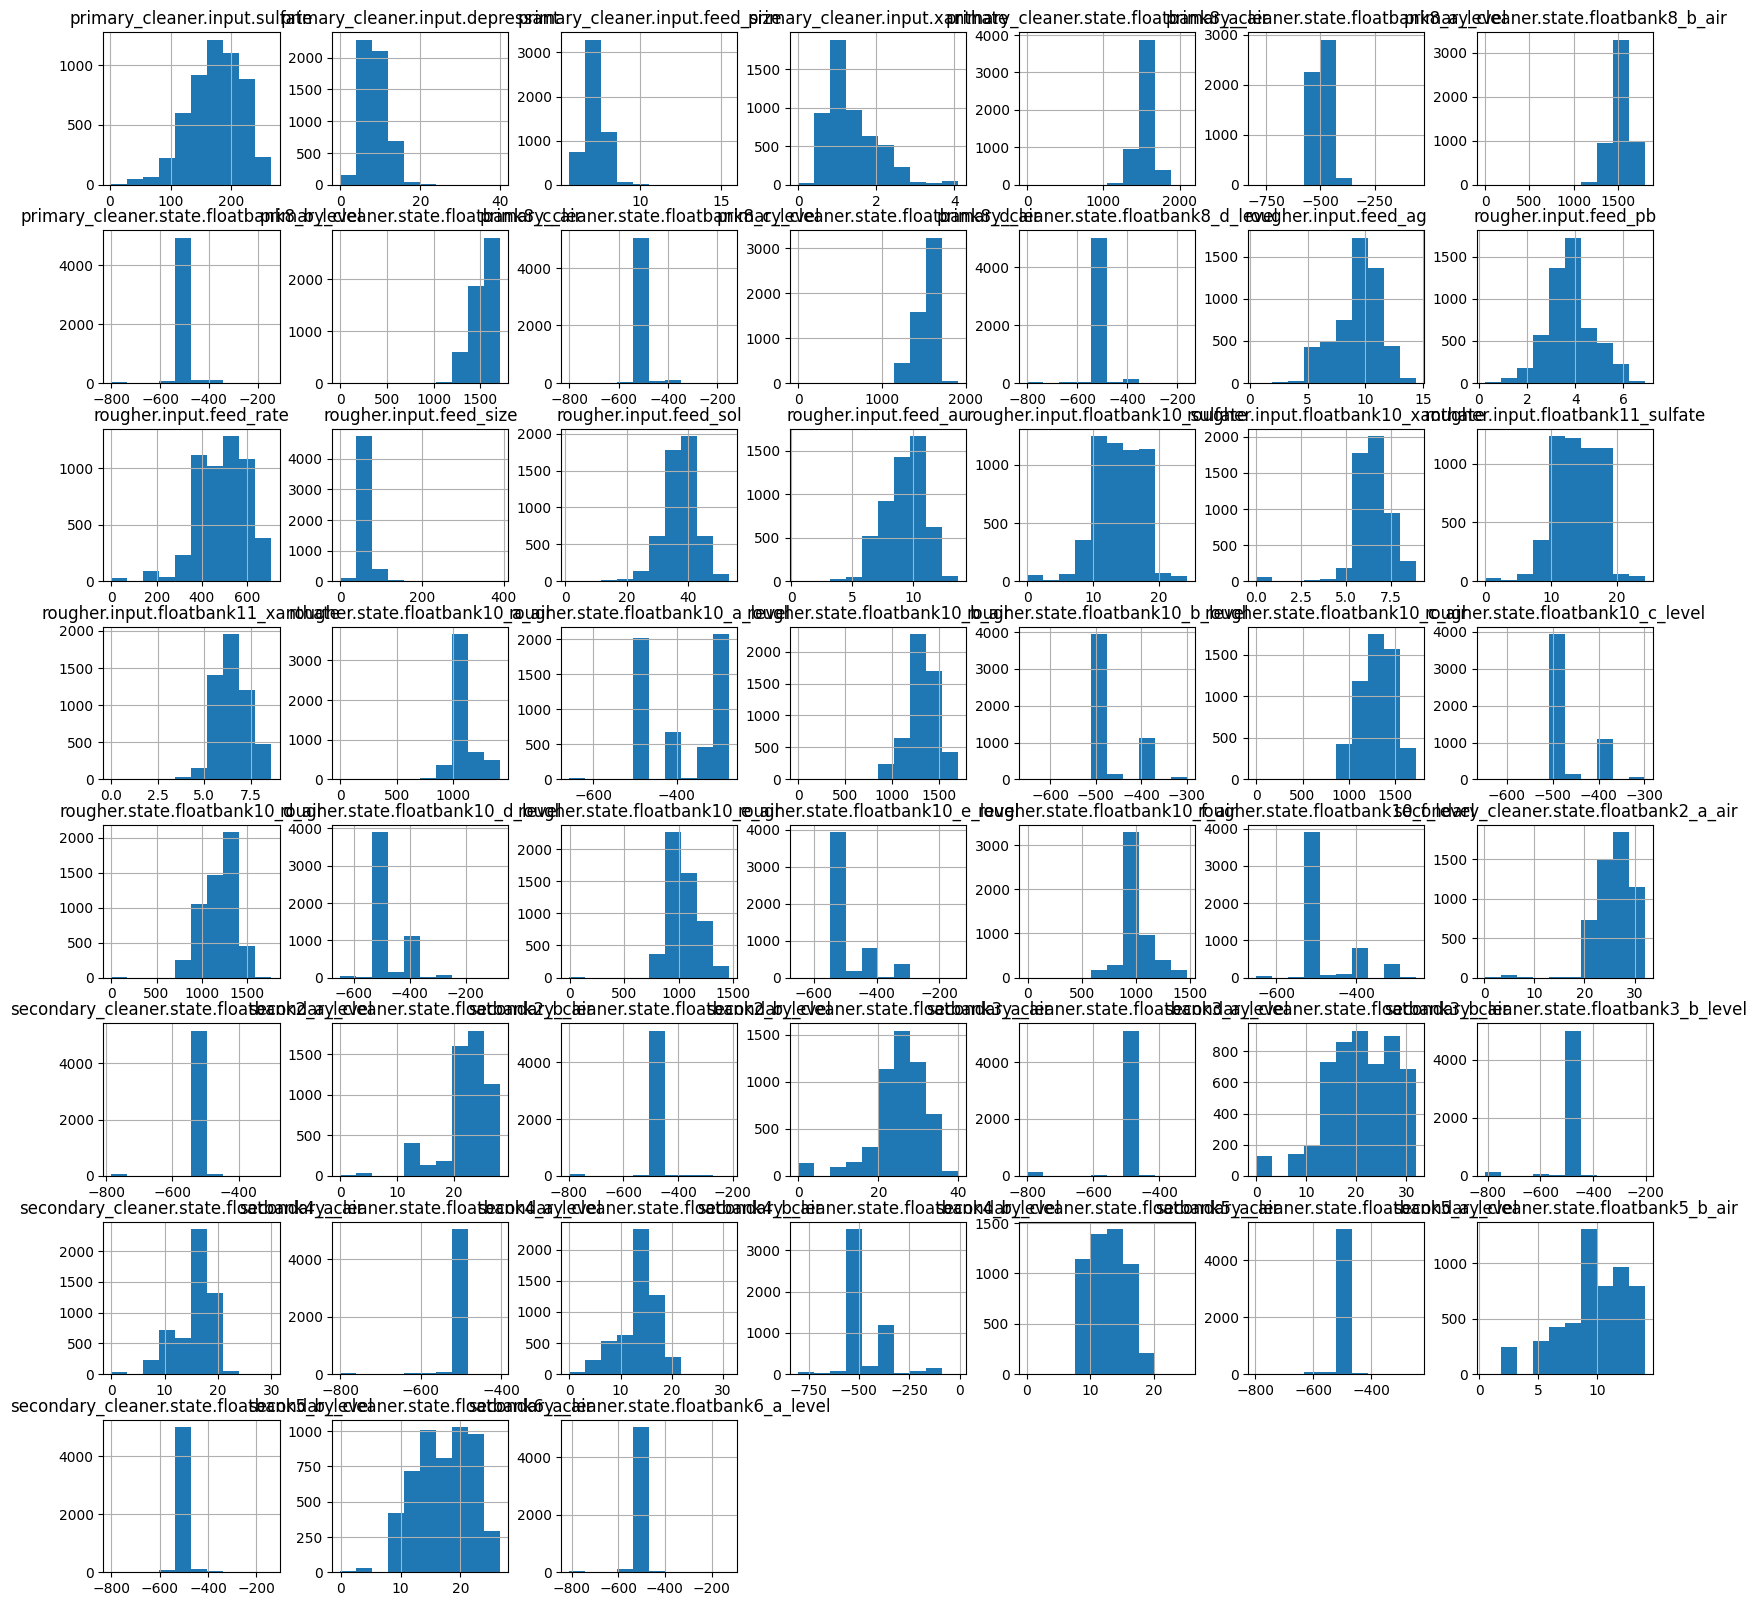

In [7]:
df_study(df['test'])

#### Полная выборка


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


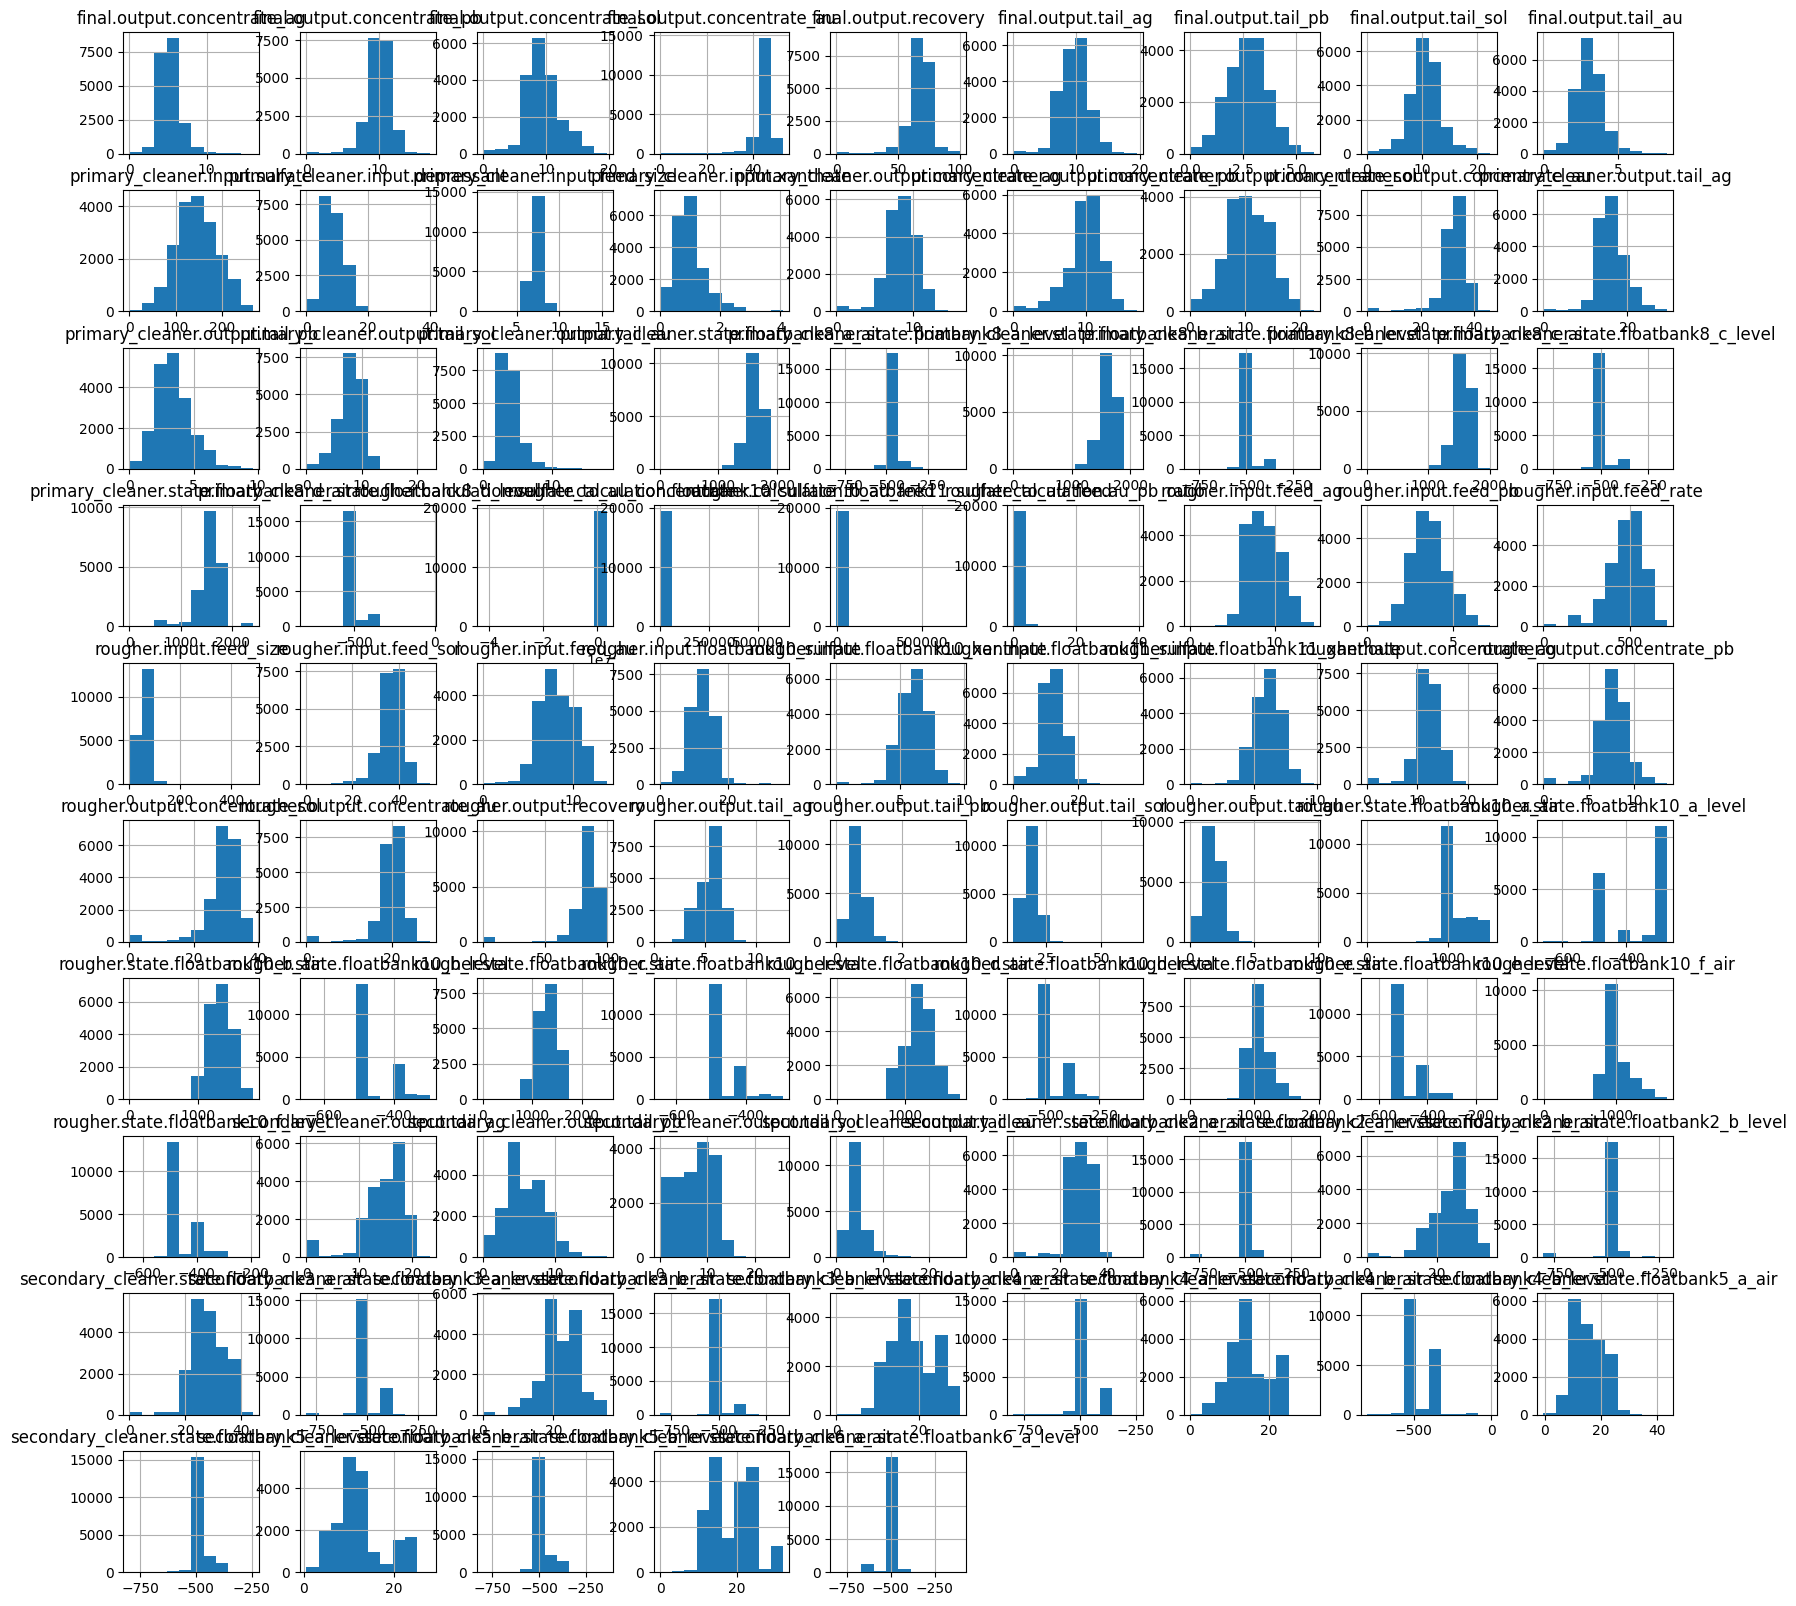

In [8]:
df_study(df['full'])

In [9]:
####  проверка совпадения стобцов
(df['train'].columns == df['full'].columns).all() # Совпадение столбцов в train и full


True

#### Вывод
загружены три файла с данными, содержащие обучающую, тестовую и исходную выборки, размеры выборок: (14149, 87), (5290, 53), (19439, 87)

Наименования столбцов в обучающей и исходной выборке совпадают. В тестовой выборке меньше на 34 столбца.

Первый столбец 'date' - дата в формате 'object', остальные столбцы 'float'. Во всех выборках есть пропуски, в обучающей и исходной больше всего пропусков в столбце "secondary_cleaner.output.tail_sol" около 10 % значений, в тестовой этого столбца нет. 
Построены гистограммы столбцов каждой выборки, часть величин распределенна нормально, имеются бимодальные и др. распределения часть величин имеет выбросы например 'rougher.input.feed_au'. 


### Проверка правильности расчета эффективности обогащения

Вычислить её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [10]:
def recovery(C,F,T):
    return C*(F-T)/F/(C-T)*100

In [11]:
recovery(df['train']['rougher.output.concentrate_au'],df['train']['rougher.input.feed_au'],df['train']['rougher.output.tail_au']) # Расчет эффективностb флотации 

0       87.11
1       86.84
2       86.84
3       87.23
4       86.69
         ... 
14144   89.57
14145   87.72
14146   88.89
14147   89.86
14148   89.51
Length: 14149, dtype: float64

In [12]:
df['train']['rougher.output.recovery'] # Эффективность флотации 

0       87.11
1       86.84
2       86.84
3       87.23
4       86.69
         ... 
14144   89.57
14145   87.72
14146   88.89
14147   89.86
14148   89.51
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [13]:
mean_absolute_error(
    df['train']['rougher.output.recovery'],
    recovery(
        df['train']['rougher.output.concentrate_au'],
        df['train']['rougher.input.feed_au'],
        df['train']['rougher.output.tail_au']
        )
    )

1.0748911125799084e-14

#### Вывод
MAE между расчётами и значением признака нулевое, т.е. признаки совпадают и расчет эффективности обогащения осуществляется правильно

### Анализ признаков, недоступных в тестовой выборке. 
Что это за параметры? К какому типу относятся?

In [14]:
df['full'].drop(df['test'].columns,axis=1).columns # столбцы которых нет в тестовой выборке]

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

In [15]:
tail_au = pd.concat([df['train']['rougher.output.tail_au'],
           df['train']['primary_cleaner.output.tail_au'],
           df['train']['secondary_cleaner.output.tail_au'],
           df['train']['final.output.tail_au']], keys=["r", "p_c","s_c", "f"],axis=1)
#tail_au[["r", "p_c","s_c"]].mean(axis=1)
tail_au

,r,p_c,s_c,f
0,1.17,2.11,2.61,2.14
1,1.18,2.35,2.49,2.22
2,1.16,2.42,2.46,2.26
3,1.08,2.26,2.32,2.15
4,1.01,2.28,2.33,2.06
...,...,...,...,...
14144,0.75,2.31,0.00,1.53
14145,0.77,2.46,0.00,1.61
14146,0.69,2.61,0.00,1.60
14147,0.57,2.80,0.00,1.60


#### Вывод
**В тестовой выборке отсутствуют данные по этапам**

1. Флотация:
* концентрации после флотации
* концентрации в отвальных хвостах
* эффективность обогащения
* Расчетные характеристики: 
    sulfate_to_au_concentrate,
    floatbank10_sulfate_to_au_feed,
    floatbank11_sulfate_to_au_feed,
    au_pb_ratio
2. Первичная очистка:
* концентрации после очистки
* концентрации в отвальных хвостах
3. Вторичная очистка:
* концентрации в отвальных хвостах
4. Для финального этапа: 
* финальные концентрации
* концентрации в отвальных хвостах
* эффективность обогащения

Согласно описанию проекта, некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Таким образом, в тестовой выборке находятся параметры, которые доступны в масштабе близком к реальному времени и по которым необходимо принимать решения об управлении процессом обогащения, т.е. обучать модель.

### Предобработка данных

In [16]:
for key in df_keys:
    print(f"\nДоли пропусков в выборке {key}\n", df[key].isna().mean().sort_values(ascending=False).head(15))



Доли пропусков в выборке train
 secondary_cleaner.output.tail_sol          0.11
rougher.state.floatbank10_e_air            0.03
rougher.input.floatbank11_xanthate         0.03
primary_cleaner.output.concentrate_sol     0.02
secondary_cleaner.state.floatbank2_a_air   0.02
final.output.concentrate_sol               0.01
rougher.input.feed_size                    0.01
primary_cleaner.input.xanthate             0.01
rougher.input.feed_pb                      0.01
final.output.tail_pb                       0.01
primary_cleaner.output.concentrate_pb      0.01
rougher.input.feed_sol                     0.01
primary_cleaner.output.tail_sol            0.00
rougher.input.floatbank11_sulfate          0.00
primary_cleaner.input.depressant           0.00
dtype: float64

Доли пропусков в выборке test
 rougher.input.floatbank11_xanthate           0.00
rougher.input.feed_sol                       0.00
secondary_cleaner.state.floatbank3_a_air     0.00
rougher.input.floatbank11_sulfate            0.00


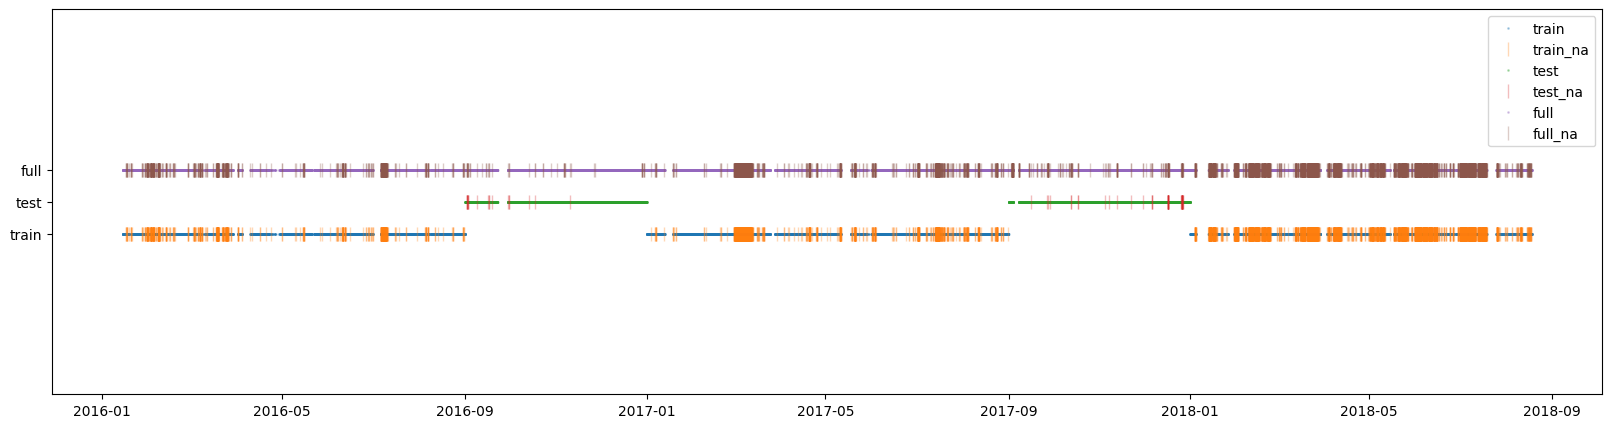

In [17]:
#график дат за которые предоставлены данные, точками обозначены все данные, штрихами - данные с пропусками
fig, ax = plt.subplots(figsize=(20,5))

for j, key in enumerate(df_keys):
    df[key]['datetime'] = pd.to_datetime (df[key]['date'], format='%Y-%m-%d %H:%M:%S')
    df[key]['plot'] = j
    ax.plot(df[key]['datetime'],df[key]['plot'],linestyle='None',marker='.',markersize=2, alpha=0.3,label = key)
    ax.plot(df[key][(df[key].isna().any(axis=1))]['datetime'],df[key][(df[key].isna().any(axis=1))]['plot'],linestyle='None',marker='|',markersize=10, alpha=0.3,label = key+'_na')   
    df[key].drop(['plot'],axis=1,inplace=True)
plt.ylim((-5,7))
ax.axes.yaxis.set_ticks(np.arange(0, 3, 1))
ax.axes.yaxis.set_ticklabels(['train','test','full'])
plt.legend()
plt.show()   


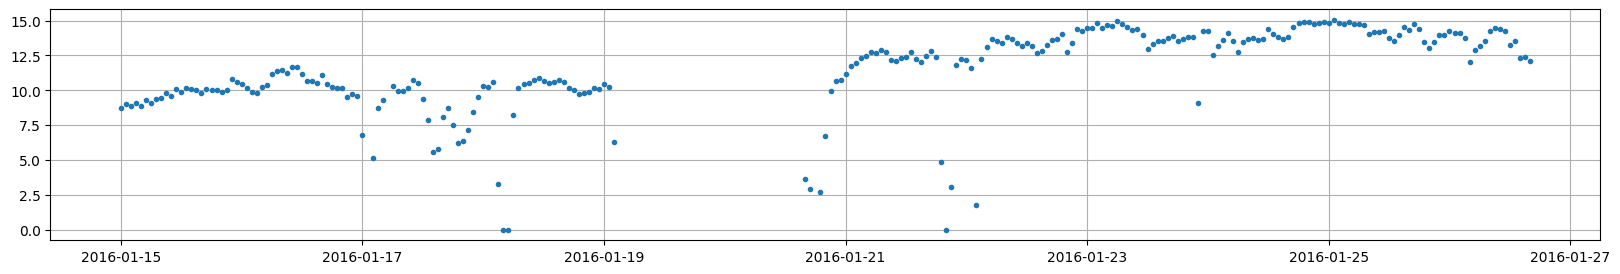

In [18]:
#График столбца с пропусками, для просмотра скорости изменения параметра
plt.figure(figsize=(20, 3))
plt.plot(df['full'].loc[0:240,'datetime'],df['full'].loc[0:240,'secondary_cleaner.output.tail_sol'],'.')
plt.grid()
plt.show()

In [19]:
#Заполнение пропусков, параметры меняются достаточно быстро, поэтому заполняю предыдущими значениями с глубиной до суток (limit=24).
for key in df_keys:
    df[key] = df[key].ffill(limit=24)
    print(f"\nОсталось пропусков в выборке {key}\n") 
    display(df[key].isna().sum().sort_values(ascending=False).head(3))



Осталось пропусков в выборке train



secondary_cleaner.output.tail_sol     409
rougher.state.floatbank10_e_air       309
rougher.input.floatbank11_xanthate    246
dtype: int64


Осталось пропусков в выборке test



date                                          0
secondary_cleaner.state.floatbank3_a_level    0
rougher.state.floatbank10_d_air               0
dtype: int64


Осталось пропусков в выборке full



secondary_cleaner.output.tail_sol     427
rougher.state.floatbank10_e_air       309
rougher.input.floatbank11_xanthate    246
dtype: int64

In [20]:
#Удаление остатвшихся пропусков
for key in df_keys:
  df[key].dropna(inplace=True) 

(-1000.0, 6000.0)

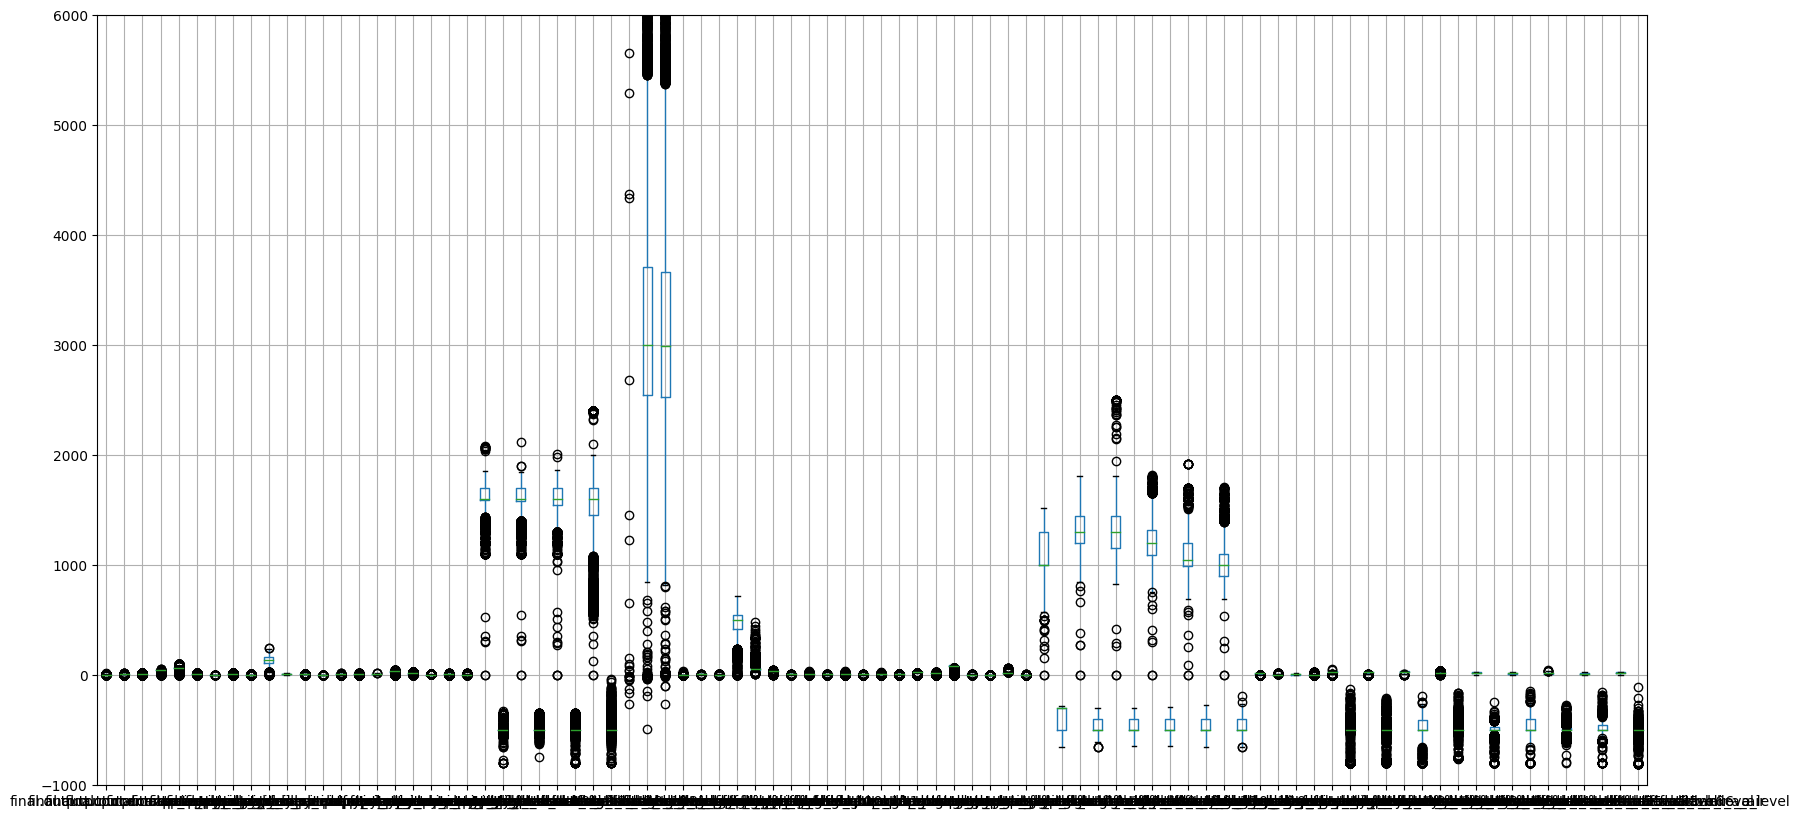

In [21]:
df['train'].boxplot(figsize=(20,10)) .set_ylim([-1000, 6000]) 

#### Вывод
Во всех выборках присутствуют пропуски, доля пропусков невелика.

Больше всего пропусков в признаке secondary_cleaner.output.tail_sol 11%.

Построены графики наличия измерений от даты, маркером "|" отмечены моменты времени, для которых есть пропуски
из графика видно, что обучающая и тестовая выборки не пересекаются по времени: за сентябрь-декабрь 2016 и 2017 гг  данные только в тестовой, за январь-август 2016, 2017, 2018 гг. - только в обучающей. Есть периоды в которых относительно много пропусков( например, март 2017 г.)

В тестовой выборке не встречается более 12 пропусков подряд
В обучающей и исходной в столбце secondary_cleaner.output.tail_sol имеется период с 270 пропусками подряд, в столбце rougher.state.floatbank10_b_air до ~160

Пропуски с глубиной менее суток заполнены предыдущими значениями, остальные пропуски удалены

В признаках содержатся выбросы.


### Вывод по подготовке данных


MAE между расчётами и значением признака нулевое, т.е. признаки совпадают и расчет эффективности обогащения осуществляется правильно

**В тестовой выборке отсутствуют данные по этапам**

1. Флотация:
* концентрации после флотации
* концентрации в отвальных хвостах
* эффективность обогащения
* Расчетные характеристики: 
    sulfate_to_au_concentrate,
    floatbank10_sulfate_to_au_feed,
    floatbank11_sulfate_to_au_feed,
    au_pb_ratio
2. Первичная очистка:
* концентрации после очистки
* концентрации в отвальных хвостах
3. Вторичная очистка:
* концентрации в отвальных хвостах
4. Для финального этапа: 
* финальные концентрации
* концентрации в отвальных хвостах
* эффективность обогащения

Во всех выборках присутствуют пропуски, доля пропусков невелика.

Больше всего пропусков в признаке secondary_cleaner.output.tail_sol 11%.

Пропуски в столбцах, имеющихся в тестовой выборке удаляю, остаются пропуски в признаке secondary_cleaner.output.tail_sol (10% в обучающейся)

В признаках содержатся выбросы.


## Анализ данных
Проанализируйте данные

2.1. Посмотреть изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

2.2. Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

2.3. Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

### Посмотреть изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 


,au,ag,pb,sol
Сырье,7.89,8.61,3.50,36.34
После флотации,19.55,11.77,7.65,28.35
После 1й очистки,32.35,8.24,9.49,10.02
После 2й очистки,43.94,5.15,10.14,9.21


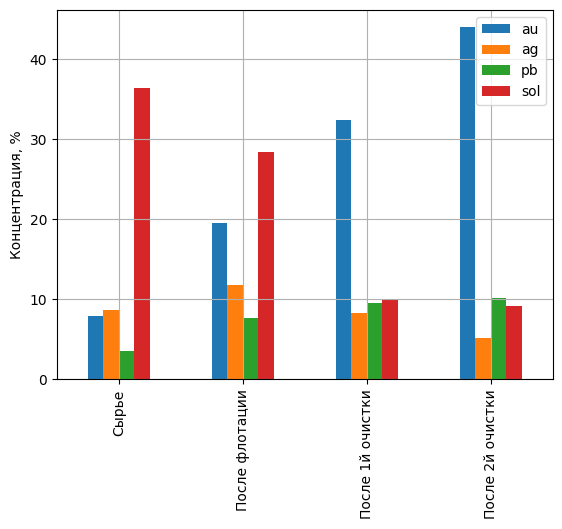

In [22]:
concentrate = {}
concen_keys =['au','ag','pb', 'sol']
stage_keys = ['rougher.input.feed_', 'rougher.output.concentrate_','primary_cleaner.output.concentrate_', 'final.output.concentrate_']
for stage in stage_keys:
    concentrate[stage] = []
    for concen in concen_keys: 
        concentrate[f"{stage}"] += [df['train'][f"{stage}{concen}"].mean()]    
concentrate = pd.DataFrame(concentrate, index=concen_keys).set_axis(['Сырье', 'После флотации','После 1й очистки', 'После 2й очистки'], axis=1).T
concentrate.plot(kind='bar',grid=True).set_ylabel('Концентрация, %')
concentrate

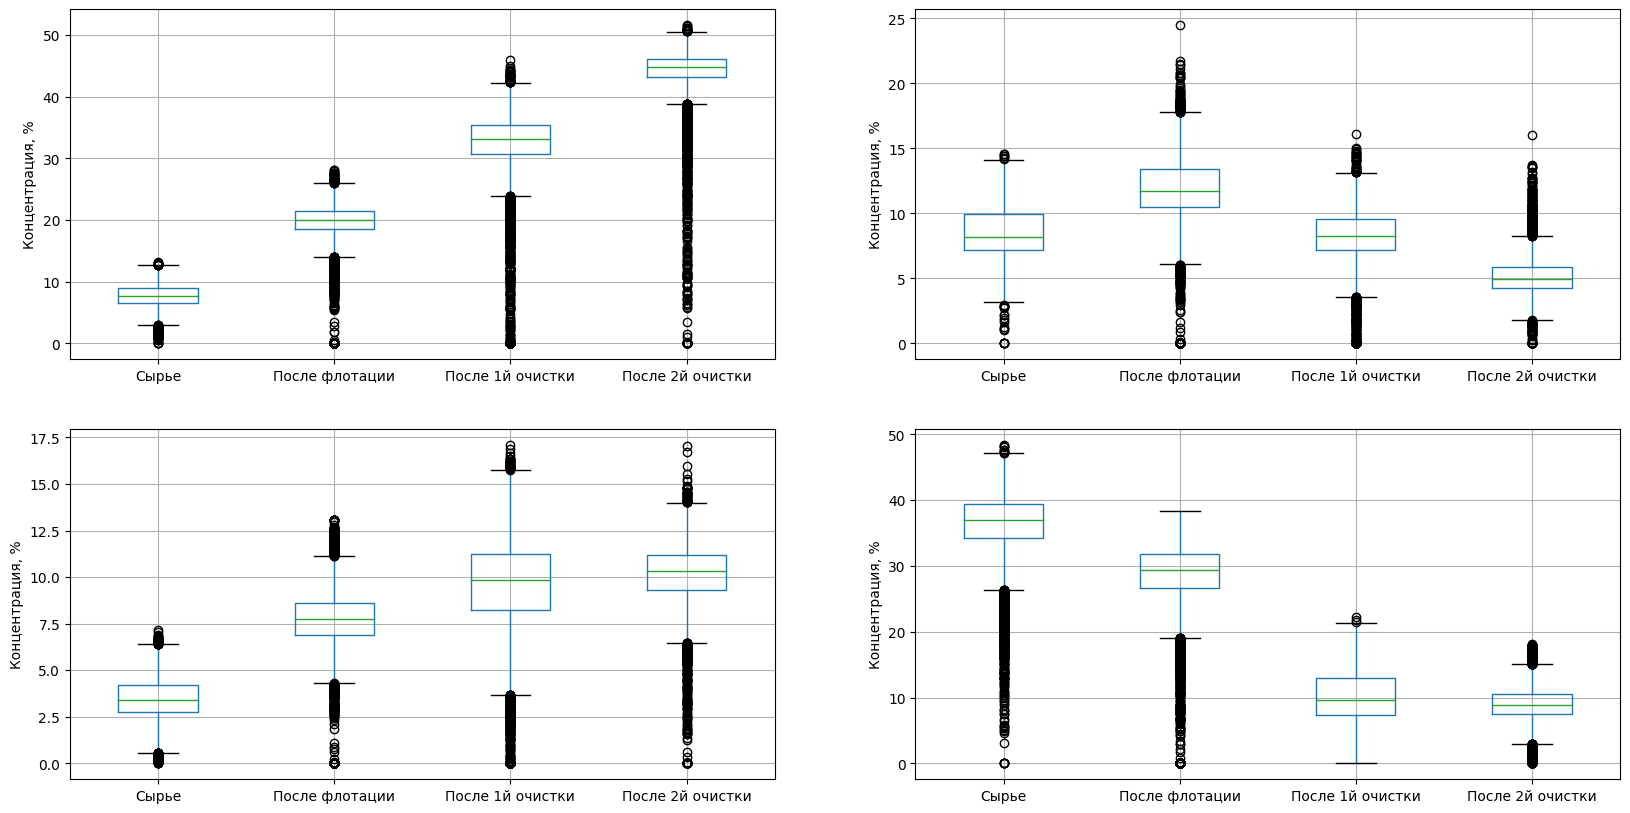

In [23]:
fig = plt.figure(figsize=(20,10))
for j, concen in enumerate(concen_keys):
    ax = fig.add_subplot(2, 2, j+1)
    df['train'].loc[:,[
                     f"rougher.input.feed_{concen}",
                     f"rougher.output.concentrate_{concen}",
                     f"primary_cleaner.output.concentrate_{concen}",
                     f"final.output.concentrate_{concen}"]
                  ].set_axis(['Сырье', 'После флотации','После 1й очистки', 'После 2й очистки'], axis=1).boxplot(ax=ax).set_ylabel('Концентрация, %')

#### Вывод
* Средняя концентрация золота на каждом этапе увеличивается с 8% до 20, 32 и 44 %
* Средняя концентрация серебра имеет максимум  12% после флотации, затем снижается до 5%. 
* Средняя концентрация свинца монотонно увеличивается
* Средняя концентрация sol (коллоида?) уменьшается с 36% до 9%


### Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках. 
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

распределение размера гранул в выборках перед и после флотации
p-значение для двухсторонней гипотезы:  6.188622531430274e-15
Проверка двухсторонней гипотезы
Отвергаем нулевую гипотезу
Cредний размер гранул в обучающей выборке: 58.60
Cредний празмер гранул в тестовой выборке: 55.95

p-значение для двухсторонней гипотезы:  1.5330824585706362e-12
Проверка двухсторонней гипотезы
Отвергаем нулевую гипотезу
Cредний размер гранул в обучающей выборке: 7.34
Cредний празмер гранул в тестовой выборке: 7.27



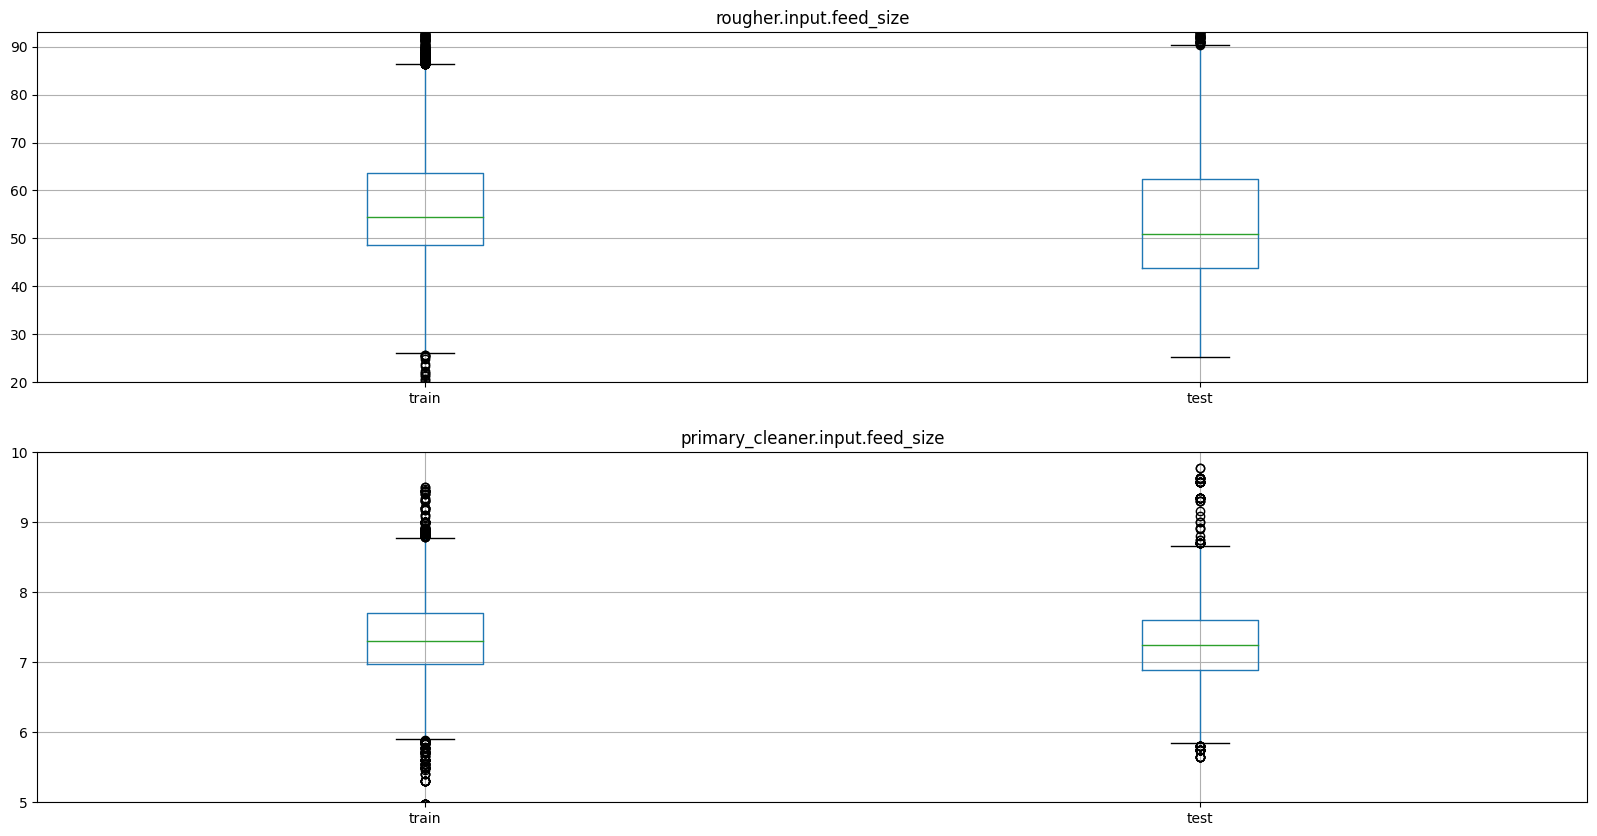

In [24]:
print("распределение размера гранул в выборках перед и после флотации")
fig = plt.figure(figsize=(20,10))
for j,size_ind in enumerate(["rougher.input.feed_size","primary_cleaner.input.feed_size"]):
    ax = fig.add_subplot(2, 1, j+1)
    pd.concat([df["train"][size_ind],df["test"][size_ind]],axis=1,keys=['train','test']).boxplot(ax=ax,figsize=(15,5)).set_ylim([5,10] if j else [20,93])#,.set_ylim(5,10)
    ax.set_title(size_ind)

    alpha = .01
    equal_var = len(df["train"][size_ind] == len(df["test"][size_ind]))

    results = st.ttest_ind(
        df["train"][size_ind], 
        df["test"][size_ind],equal_var=equal_var)
    print(f'p-значение для двухсторонней гипотезы:  {results.pvalue}')
    print('Проверка двухсторонней гипотезы')
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу") 
     
    print(f"Cредний размер гранул в обучающей выборке: { df['train'][size_ind].mean():.2f}")
    print(f"Cредний празмер гранул в тестовой выборке: {df['test'][size_ind].mean():.2f}\n")

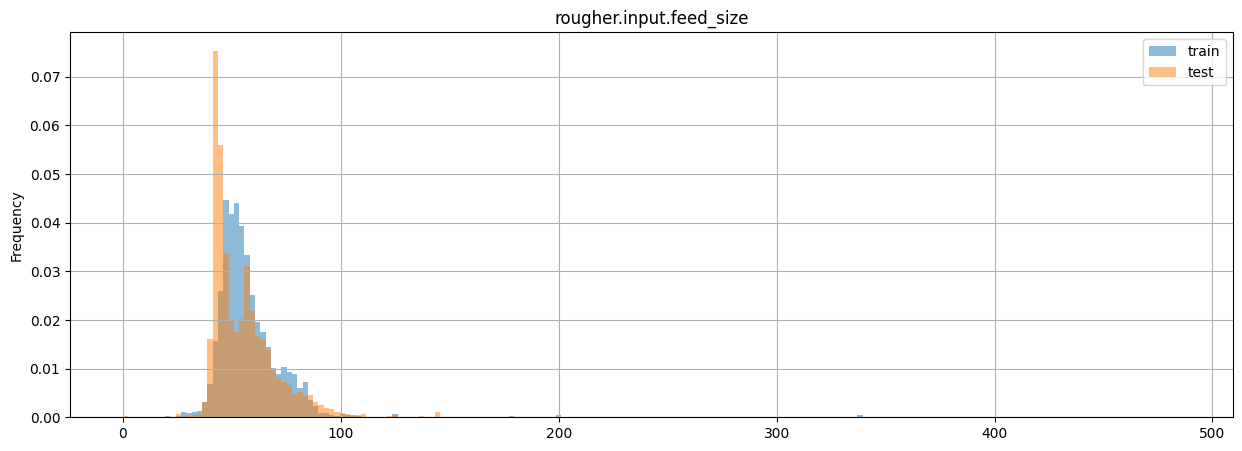

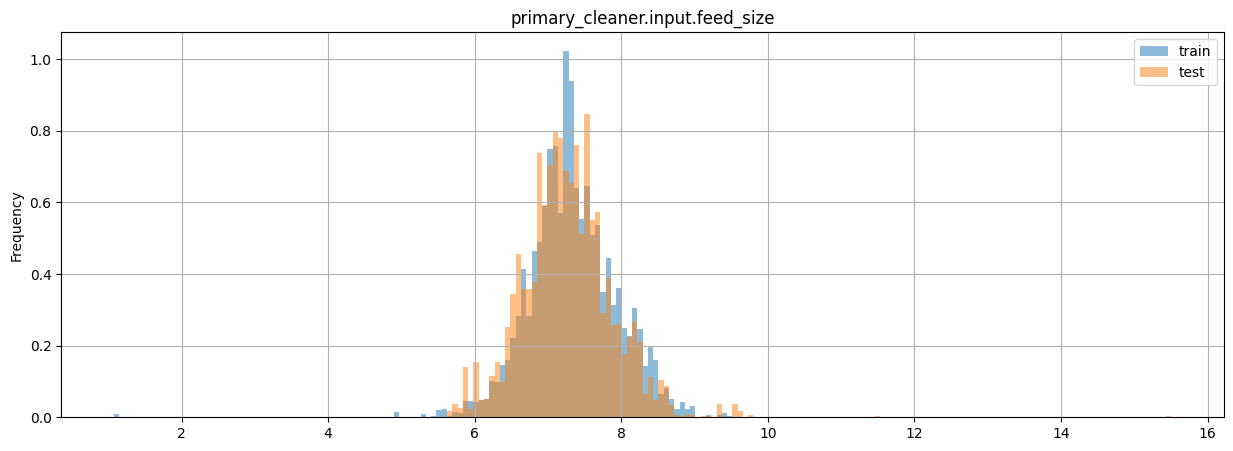

In [25]:
for j,size_ind in enumerate(["rougher.input.feed_size","primary_cleaner.input.feed_size"]):
    pd.concat([df["train"][size_ind],df["test"][size_ind]],axis=1,keys=['train','test']).plot(kind='hist',bins=200,figsize=(15,5),alpha = 0.5,density=True,grid=True).set_title(size_ind)

#### Вывод
В результате сравнения средних размеров гранул в обучающей и тестовой выборках установлено, что среднее значения статистически не равны, распределние гранул  после флотации близко к нормальному, распределение перед флотацией - бимодальное для тестовой выборки, оба тестовых распределения статистически смещены влево. 
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

,au,ag,pb,sol,au+ag+pb,au+ag+pb+sol
Сырье,7.89,8.61,3.50,36.34,19.99,56.33
После флотации,19.55,11.77,7.65,28.35,38.97,67.32
После 1й очистки,32.35,8.24,9.49,10.02,50.08,60.09
После 2й очистки,43.94,5.15,10.14,9.21,59.24,68.45


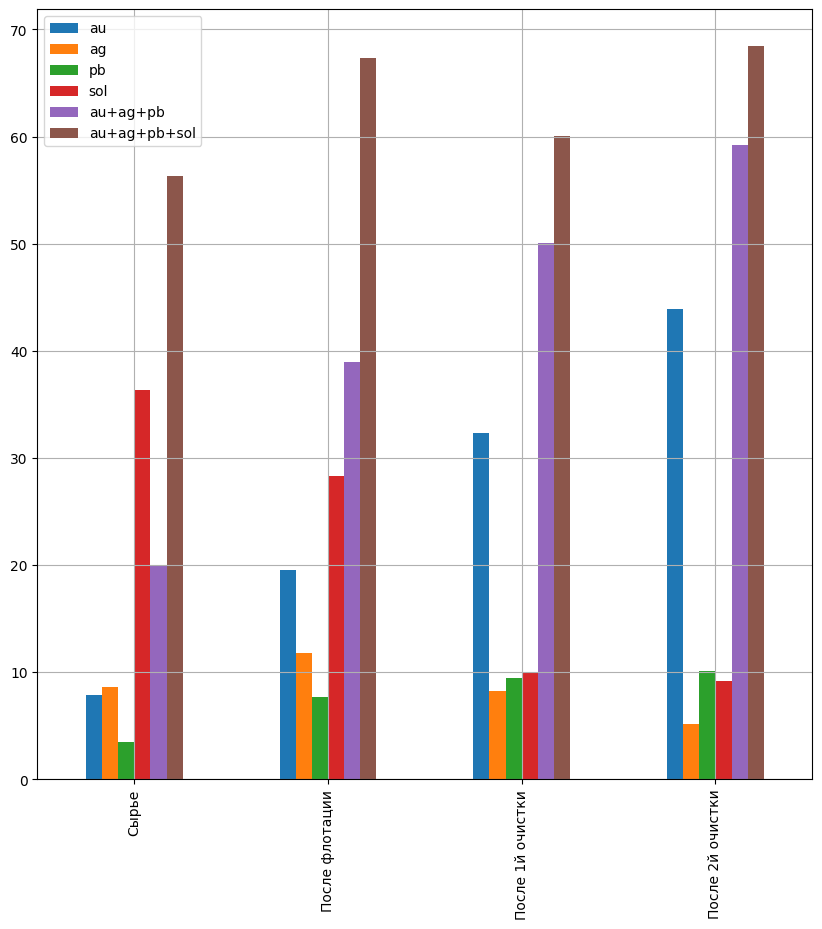

In [26]:
concentrate = {}
concen_keys =['au','ag','pb', 'sol']
stage_keys = ['rougher.input.feed_', 'rougher.output.concentrate_','primary_cleaner.output.concentrate_', 'final.output.concentrate_']
for stage in stage_keys:
  concentrate[stage] = []
  for concen in concen_keys: 
    concentrate[f"{stage}"] += [df['train'][f"{stage}{concen}"].mean()]    
concentrate = pd.DataFrame(concentrate, index=concen_keys).set_axis(['Сырье', 'После флотации','После 1й очистки', 'После 2й очистки'], axis=1).T
concentrate['au+ag+pb'] = concentrate.loc[:,['au','ag','pb']].sum(axis=1)
concentrate['au+ag+pb+sol'] = concentrate.loc[:,['au','ag','pb','sol']].sum(axis=1)

concentrate.plot(kind='bar',figsize= (10,10),grid=True)
display(concentrate)


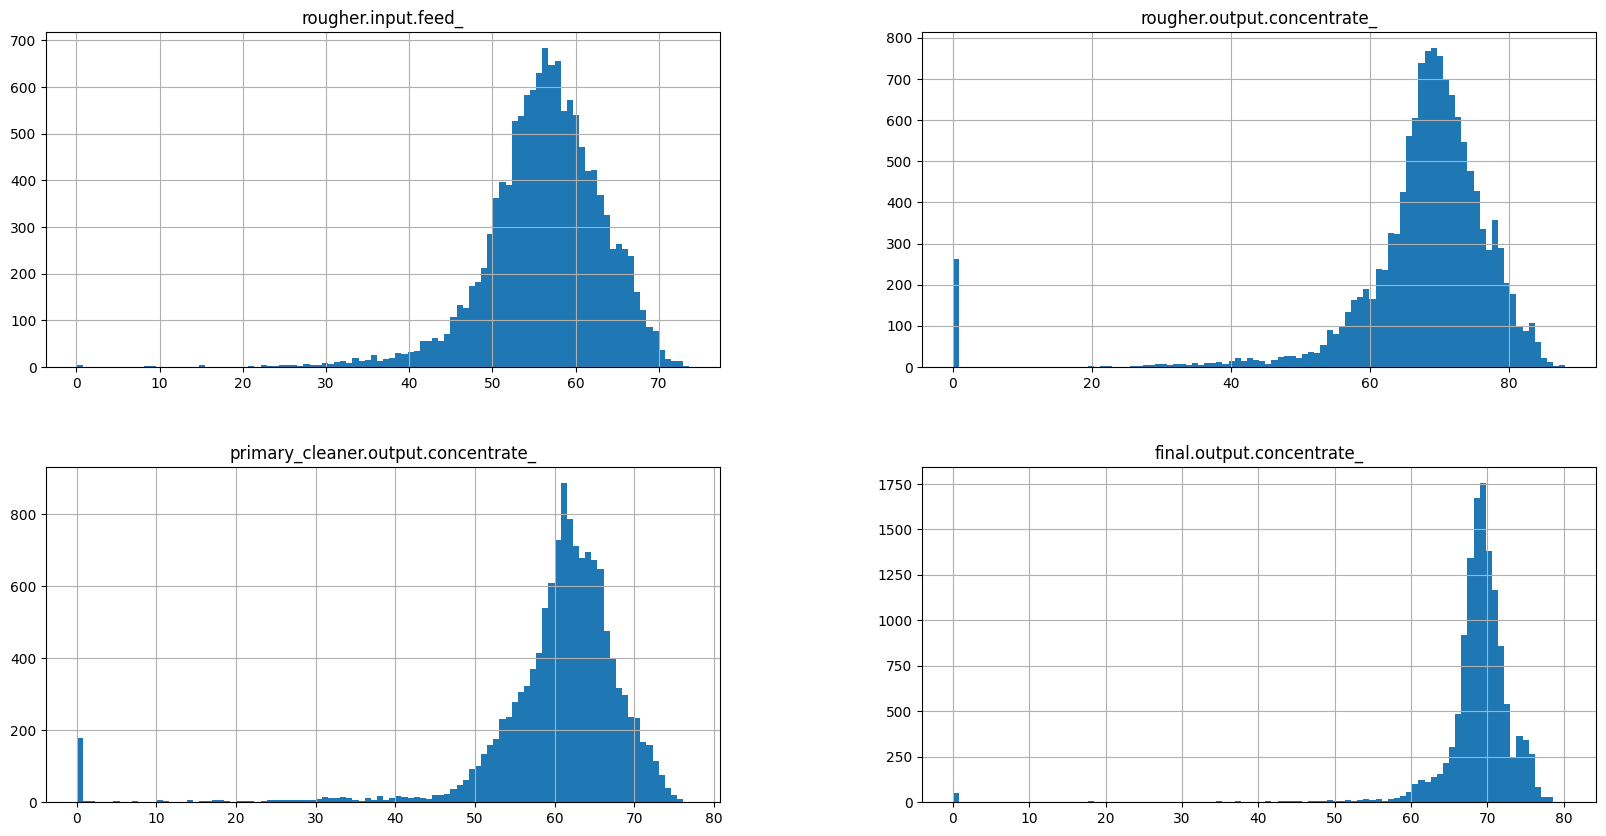

In [27]:
sum_concentrate ={}

for stage in stage_keys:
    sum_concentrate[stage] = df['train'].loc[:,[f"{stage}au",f"{stage}ag",f"{stage}pb",f"{stage}sol"]].sum(axis=1)
sum_concentrate=pd.DataFrame(sum_concentrate)
sum_concentrate.hist(bins=100, figsize=(20,10));

In [28]:
df['train'] = df['train'][(
    (sum_concentrate['rougher.output.concentrate_']>1)&
    (sum_concentrate['primary_cleaner.output.concentrate_']>1)&
    (sum_concentrate['final.output.concentrate_']>1))]

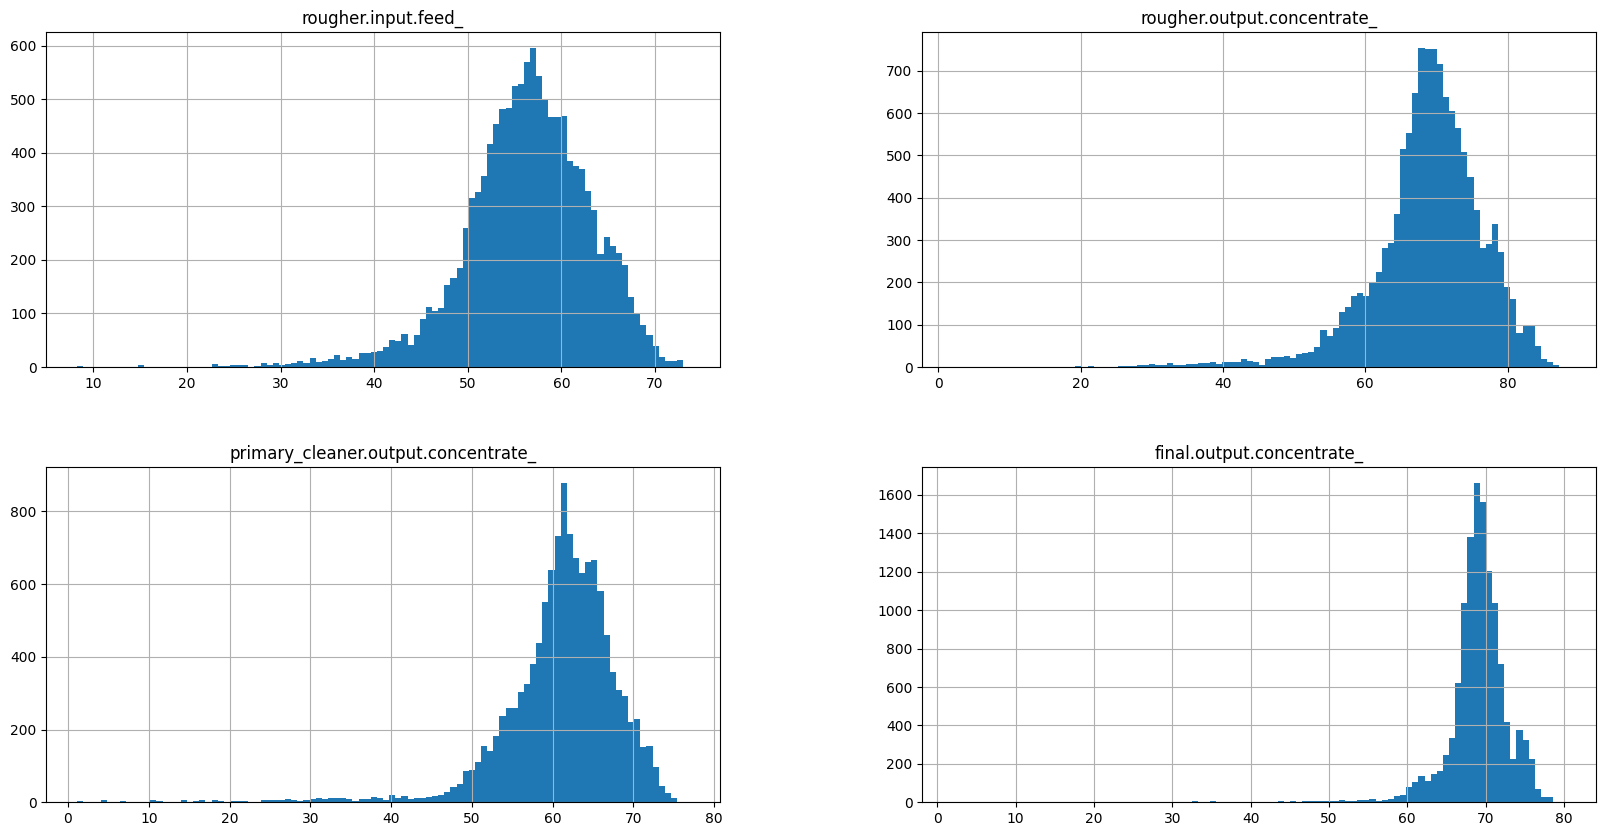

In [29]:
sum_concentrate ={}

for stage in stage_keys:
    sum_concentrate[stage] = df['train'].loc[:,[f"{stage}au",f"{stage}ag",f"{stage}pb",f"{stage}sol"]].sum(axis=1)
sum_concentrate=pd.DataFrame(sum_concentrate)
sum_concentrate.hist(bins=100, figsize=(20,10));

#### Вывод
Построены гистрограммы суммарной концентрации, гистограммы на входе и выходе первичной очистки имеют аномальные нулевые значени, удалил аномальные значения
Средняя суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах сохраняется в диапазоне 56-69%.
Суммарная концентрация металлов растет.


### Вывод по анализу данных

1. Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
* Средняя концентрация золота на каждом этапе увеличивается с 8% до 20, 32 и 44 %
* Средняя концентрация серебра имеет максимум  12% после флотации, затем снижается до 5%. 
* Средняя концентрация свинца монотонно увеличивается
* Средняя концентрация sol (коллоида?) уменьшается с 36% до 9%

2. В результате сравнения средних размеров гранул в обучающей и тестовой выборках установлено, что среднее значения статистически не равны, распределние гранул после флотации близко к нормальному, распределение перед флотацией - бимодальное для тестовой выборки, оба тестовых распределения статистически смещены влево. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

3. Средняя суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах сохраняется в диапазоне 56-69%. Гистрограммы суммарной концентрации на входе и выходе первичной очистки имеют аномальные нулевые значени
Суммарная концентрация металлов растет.

## Модель
 Постройте модель

3.1. Написать функцию для вычисления итоговой sMAPE.

3.2. Обучить разные модели и оценить их качество кросс-валидацией. Выбрать лучшую модель и проверить её на тестовой выборке.


### Функция для вычисления итоговой sMAPE. 


In [30]:
def result_smape(y_true, y_pred, is_cross_val=0):
    y_pred = pd.DataFrame(y_pred, index=y_true.index, columns=y_true.columns) if is_cross_val else y_pred
    smape_rougher = (y_true['rougher.output.recovery']-y_pred['rougher.output.recovery']).abs()/((y_true['rougher.output.recovery'].abs()+y_pred['rougher.output.recovery'].abs()))
    smape_final = (y_true['final.output.recovery']-y_pred['final.output.recovery']).abs()/((y_true['final.output.recovery'].abs()+y_pred['final.output.recovery'].abs()))
    return(.25*smape_rougher.mean()+.75*smape_final.mean())*2



#### Вывод
Создана функция, подсчитывающая итоговый sMape (в долях, не процентах).

### Обучение разных моделей и оценка их качества кросс-валидацией. 

Выбрать лучшую модель и проверить её на тестовой выборке.

In [31]:
# разделение признаков 
#state = np.random.RandomState(12345)

features = df['train'].loc[:,df['test'].columns].drop(['date','datetime'] , axis=1)
target = df['train'].loc[:,['rougher.output.recovery','final.output.recovery']]

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
print('Размеры выборок:',features_train.shape, features_valid.shape, target_train.shape, target_valid.shape)


Размеры выборок: (9444, 52) (3148, 52) (9444, 2) (3148, 2)


In [32]:
# масштабирование численных признаков, все признаки численные
scaler = StandardScaler()
scaler.fit(features_train)
features_train = pd.DataFrame(scaler.transform(features_train), index=features_train.index)
features_valid = pd.DataFrame(scaler.transform(features_valid), index=features_valid.index)
features = pd.DataFrame(scaler.transform(features), index=features.index)

In [33]:
#Обучение модели линейной регрессии 
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = pd.DataFrame(model.predict(features_valid), index=target_valid.index, columns=target_valid.columns)
print(f'Метрики обученной модели: MSE: {mean_squared_error(target_valid, predicted_valid):.2f}, RMSE: {mean_squared_error(target_valid, predicted_valid,squared=False):.2f},',
      f'MAE: {mean_absolute_error(target_valid, predicted_valid):.2f}, R2_score: {r2_score(target_valid,predicted_valid):.3f}')
print(f"Средние эффективности флотации и финальные предсказанные - {predicted_valid.mean().round(2).to_list()}, реальные - {target_valid.mean().round(2).to_list()}")
print(f"Итоговая sMAPE модели: {result_smape( target_valid,predicted_valid):.2%}")

Метрики обученной модели: MSE: 39.24, RMSE: 6.17, MAE: 4.28, R2_score: 0.459
Средние эффективности флотации и финальные предсказанные - [84.23, 66.6], реальные - [84.25, 66.52]
Итоговая sMAPE модели: 6.95%


In [34]:
# константная модель
predict_const_mean = pd.DataFrame(index=target_valid.index,columns=target_valid.columns)
predict_const_mean.loc[:,target_valid.columns[0]] = target_train.mean()[0]
predict_const_mean.loc[:,target_valid.columns[1]] = target_train.mean()[1]
print(f'Метрики константной модели: MSE: {mean_squared_error(target_valid, predict_const_mean):.2f}, RMSE: {mean_squared_error(target_valid, predict_const_mean,squared=False):.2f},',
      f'MAE: {mean_absolute_error(target_valid, predict_const_mean):.2f}, R2_score: {r2_score(target_valid, predict_const_mean):.3f}')
print(f"Итоговая sMAPE константной модели: {result_smape(target_valid,predict_const_mean):.2%}")

Метрики константной модели: MSE: 70.36, RMSE: 8.36, MAE: 6.19, R2_score: -0.000
Итоговая sMAPE константной модели: 9.32%


In [35]:
for model_name in [DecisionTreeRegressor,RandomForestRegressor]:
    model = model_name(random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = pd.DataFrame(model.predict(features_valid), index=target_valid.index, columns=target_valid.columns)
    print(f'Метрики обученной модели {model_name}: MSE: {mean_squared_error(target_valid, predicted_valid):.2f}, RMSE: {mean_squared_error(target_valid, predicted_valid,squared=False):.2f},',
          f'MAE: {mean_absolute_error(target_valid, predicted_valid):.2f}, R2_score: {r2_score(target_valid,predicted_valid):.3f}')
    print(f"Средние эффективности флотации и финальные предсказанные - {predicted_valid.mean().round(2).to_list()}, реальные - {target_valid.mean().round(2).to_list()}")
    print(f"Итоговая sMAPE модели: {result_smape(target_valid,predicted_valid):.2%}\n")

Метрики обученной модели <class 'sklearn.tree._classes.DecisionTreeRegressor'>: MSE: 39.57, RMSE: 6.18, MAE: 3.80, R2_score: 0.457
Средние эффективности флотации и финальные предсказанные - [84.2, 66.56], реальные - [84.25, 66.52]
Итоговая sMAPE модели: 6.55%

Метрики обученной модели <class 'sklearn.ensemble._forest.RandomForestRegressor'>: MSE: 21.44, RMSE: 4.50, MAE: 2.74, R2_score: 0.710
Средние эффективности флотации и финальные предсказанные - [84.28, 66.66], реальные - [84.25, 66.52]
Итоговая sMAPE модели: 4.75%



In [45]:
# Создание метрики из функции итогового sMAPE
res_smape_scorer = make_scorer(result_smape, is_cross_val=1, greater_is_better=True)

In [46]:
%%time
# Кросс-валидация моделей
for model_name in [LinearRegression,DecisionTreeRegressor,RandomForestRegressor]:
    try:
        model = model_name(random_state=12345)
    except:
        model = model_name()
    scores = cross_val_score(model, features, target, cv=4, scoring=res_smape_scorer)
    print(f'модель {model_name}, sMAPE: {scores.mean():.2%} ')

#cv=4
#модель <class 'sklearn.linear_model._base.LinearRegression'>, sMAPE: 9.61%  
#модель <class 'sklearn.tree._classes.DecisionTreeRegressor'>, sMAPE: 14.74%  
#модель <class 'sklearn.ensemble._forest.RandomForestRegressor'>, sMAPE: 9.67%  

модель <class 'sklearn.linear_model._base.LinearRegression'>, sMAPE: 9.61% 
модель <class 'sklearn.tree._classes.DecisionTreeRegressor'>, sMAPE: 14.74% 
модель <class 'sklearn.ensemble._forest.RandomForestRegressor'>, sMAPE: 9.67% 
CPU times: total: 1min 40s
Wall time: 1min 51s


In [38]:
model = LinearRegression()
model.fit(features_train, target_train)
dff = df['test'].merge(df['full'].loc[:,['date','rougher.output.recovery','final.output.recovery']], on='date', how='left').dropna()

features_test = dff.loc[:,df['test'].columns].drop(['date','datetime'] , axis=1)
target_test = dff.loc[:,['rougher.output.recovery','final.output.recovery']]

features_test = pd.DataFrame(scaler.transform(features_test), index=features_test.index)
predicted_test = pd.DataFrame(model.predict(features_test), index=target_test.index, columns=target_test.columns)

print(f'Метрики обученной модели: MSE: {mean_squared_error(target_test, predicted_test):.2f}, RMSE: {mean_squared_error(target_test, predicted_test,squared=False):.2f},',
      f'MAE: {mean_absolute_error(target_test, predicted_test):.2f}, R2_score: {r2_score(target_test,predicted_test):.3f}')
print(f"Итоговая sMAPE модели на тестовой выборке: {result_smape( target_test,predicted_test):.2%}\n")

predict_const_mean = pd.DataFrame(index=target_test.index,columns=target_test.columns)
predict_const_mean.loc[:,target_test.columns[0]] = target_train.mean()[0]
predict_const_mean.loc[:,target_test.columns[1]] = target_train.mean()[1]
print(f'Метрики константной модели: MSE: {mean_squared_error(target_test, predict_const_mean):.2f}, RMSE: {mean_squared_error(target_test, predict_const_mean,squared=False):.2f},',
      f'MAE: {mean_absolute_error(target_test, predict_const_mean):.2f}, R2_score: {r2_score(target_test, predict_const_mean):.3f}')
print(f"Итоговая sMAPE константной модели на тестовой выборке: {result_smape(target_test,predict_const_mean):.2%}")

Метрики обученной модели: MSE: 125.86, RMSE: 11.11, MAE: 5.77, R2_score: 0.018
Итоговая sMAPE модели на тестовой выборке: 9.32%

Метрики константной модели: MSE: 132.41, RMSE: 11.37, MAE: 6.29, R2_score: -0.025
Итоговая sMAPE константной модели на тестовой выборке: 9.95%


#### Вывод
Выполнено разделение целевых признаков, из обучающей выборки выделена валидационная. Выполнено масштабирование признаков. Обучены модели: Линейная регрессия, Дерево решений в регрессии, Случайный лес в регрессии. На валидационной выборке для моделей расчитана метрика  итоговый sMAPE: 8.61%, 8.51% и 6.36% соответсвенно. Для константной модели метрика равна 9.32%.
Для тестовой выборки восстановлены целевые признаки из массива исходных данных. 
По результатам кросс-валидации sMAPE моделей: 9.61%, 14.74%, 9.67%. Лучшая модель - Линейная регрессия. Выполнена проверка лучшей модели на тестовой выборке: sMAPE = 9.32% немного лучше, чем для константной модели (9,95 %).

### Вывод по моделе

1.   Создана функция, подсчитывающая итоговый sMape (в долях, не процентах).
2.   Выполнено разделение целевых признаков, из обучающей выборки выделена валидационная. Выполнено масштабирование признаков. Обучены модели: Линейная регрессия, Дерево решений в регрессии, Случайный лес в регрессии. На валидационной выборке для моделей расчитана метрика  итоговый sMAPE: 8.61%, 8.51% и 6.36% соответсвенно. Для константной модели метрика равна 9.32%.
Для тестовой выборки восстановлены целевые признаки из массива исходных данных. 
По результатам кросс-валидации sMAPE моделей: 9.61%, 14.74%, 9.67%. Лучшая модель - Линейная регрессия. Выполнена проверка лучшей модели на тестовой выборке: sMAPE = 9.32% немного лучше, чем для константной модели (9,95 %).





## Общий вывод

В ходе работы было выполнено:
1. Подготовка данных

MAE между расчётами и значением признака нулевое, т.е. признаки совпадают и расчет эффективности обогащения осуществляется правильно

**В тестовой выборке отсутствуют данные по этапам**
*Флотация:*
* концентрации после флотации
* концентрации в отвальных хвостах
* эффективность обогащения
* Расчетные характеристики: 
    sulfate_to_au_concentrate,
    floatbank10_sulfate_to_au_feed,
    floatbank11_sulfate_to_au_feed,
    au_pb_ratio
    
*Первичная очистка:*
* концентрации после очистки
* концентрации в отвальных хвостах

*Вторичная очистка:*
* концентрации в отвальных хвостах

*Для финального этапа: *
* финальные концентрации
* концентрации в отвальных хвостах
* эффективность обогащения

Во всех выборках присутствуют пропуски, доля пропусков невелика.

Больше всего пропусков в признаке secondary_cleaner.output.tail_sol 11%.

Пропуски в столбцах, имеющихся в тестовой выборке удаляю, остаются пропуски в признаке secondary_cleaner.output.tail_sol (10% в обучающейся)

В признаках содержатся выбросы.

2. Анализ данных

-- Рассмотрено изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
* Средняя концентрация золота на каждом этапе увеличивается с 8% до 20, 32 и 44 %
* Средняя концентрация серебра имеет максимум  12% после флотации, затем снижается до 5%. 
* Средняя концентрация свинца монотонно увеличивается
* Средняя концентрация sol (коллоида) уменьшается с 36% до 9%

-- В результате сравнения средних размеров гранул в обучающей и тестовой выборках установлено, что среднее значения статистически не равны, распределние гранул после флотации близко к нормальному, распределение перед флотацией - бимодальное для тестовой выборки, оба тестовых распределения статистически смещены влево. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

-- Средняя суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах сохраняется в диапазоне 56-69%. Гистрограммы суммарной концентрации на входе и выходе первичной очистки имеют аномальные нулевые значени
Суммарная концентрация металлов растет.

3. Построена и протестирована модель прогнозирования 

-- Создана функция, подсчитывающая итоговый sMape (в долях, не в %).

-- Выполнено разделение целевых признаков, из обучающей выборки выделена валидационная. Выполнено масштабирование признаков. Обучены модели: Линейная регрессия, Дерево решений в регрессии, Случайный лес в регрессии. На валидационной выборке для моделей расчитана метрика  итоговый sMAPE: 8.61%, 8.51% и 6.36% соответсвенно. Для константной модели метрика равна 9.32%.
Для тестовой выборки восстановлены целевые признаки из массива исходных данных. 
По результатам кросс-валидации sMAPE моделей: 9.61%, 14.74%, 9.67%. Лучшая модель - Линейная регрессия. Выполнена проверка лучшей модели на тестовой выборке: sMAPE = 9.32% немного лучше, чем для константной модели (9,95 %)..


Таким образом, подготовлен прототип модели машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

